## Import packages

In [4]:
import numpy as np 
import csv 
import glob
import pandas as pd
import os
import sys
from tqdm import tqdm
from joblib import Parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt

## Select dataset and n_starts

In [2]:
dataset = "magic_carpet_2020"
n_starts = 35
n_synthetic_pars = 23  # Number of synthetic participants

## Helper functions

In [6]:
def ComputeBIC(k, n, nll,ddm):
    # k: number of parameters
    # n: number of datapoints
    # nll: negative log-likelihood

    if (ddm):
        # Note that for models with ddm, nll is multiplied by a factor 2*n, because during the optimization procedure, nll is divided by that factor
        bic_score = k*np.log(n) + 2*nll*(2*n)
    else:
        bic_score = k*np.log(n) + 2*nll
     
    return bic_score

def ComputeAIC(k, n, nll, ddm):
    # k: number of parameters
    # n: number of datapoints
    # nll: negative log-likelihood

    if (ddm):
        # Note that for models with ddm, nll is multiplied by a factor 2*n, because during the optimization procedure, nll is divided by that factor
        aic_score = 2*(k + nll*(2*n))
    else:
        aic_score = 2*(k + nll)
     
    return aic_score

# Model Recovery Analysis for AIF/HRL-DDM models

## Import files

In [4]:
# Import all the fits for dataset generated by RL_ddm

genM = 'RL_ddm'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'_DRMlinear/'


df_fitM_RL_ddm_genM_RL_ddm = pd.read_csv(folder_path+'mr_res_FitM'+'RL_ddm'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'_DRMlinear.csv')

df_fitM_AI_ddm0_genM_RL_ddm = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm0'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'_DRMlinear.csv')

df_fitM_AI_ddm1_genM_RL_ddm = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm1'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'_DRMlinear.csv')

df_fitM_AI_ddm2_genM_RL_ddm = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm2'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM + '_DRMlinear.csv')

df_fitM_AI_ddm3_genM_RL_ddm = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm3'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM' + genM + '_DRMlinear.csv')

# Import all the fits for dataset generated by AI_ddm0

genM = 'AI_ddm0'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'_DRMlinear/'


df_fitM_RL_ddm_genM_AI_ddm0 = pd.read_csv(folder_path+'mr_res_FitM'+'RL_ddm'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'_DRMlinear.csv')

df_fitM_AI_ddm0_genM_AI_ddm0 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm0'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'_DRMlinear.csv')

df_fitM_AI_ddm1_genM_AI_ddm0 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm1'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'_DRMlinear.csv')

df_fitM_AI_ddm2_genM_AI_ddm0 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm2'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM + '_DRMlinear.csv')

df_fitM_AI_ddm3_genM_AI_ddm0 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm3'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM' + genM + '_DRMlinear.csv')

# Import all the fits for dataset generated by AI_ddm1

genM = 'AI_ddm1'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'_DRMlinear/'

df_fitM_RL_ddm_genM_AI_ddm1 = pd.read_csv(folder_path+'mr_res_FitM'+'RL_ddm'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'_DRMlinear.csv')

df_fitM_AI_ddm0_genM_AI_ddm1 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm0'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

df_fitM_AI_ddm1_genM_AI_ddm1 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm1'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

df_fitM_AI_ddm2_genM_AI_ddm1 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm2'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

df_fitM_AI_ddm3_genM_AI_ddm1 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm3'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')


# Import all the fits for dataset generated by AI_ddm2
genM = 'AI_ddm2'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'_DRMlinear/'

df_fitM_RL_ddm_genM_AI_ddm2 = pd.read_csv(folder_path+'mr_res_FitM'+'RL_ddm'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'_DRMlinear.csv')

df_fitM_AI_ddm0_genM_AI_ddm2 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm0'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

df_fitM_AI_ddm1_genM_AI_ddm2 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm1'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

df_fitM_AI_ddm2_genM_AI_ddm2 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm2'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

df_fitM_AI_ddm3_genM_AI_ddm2 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm3'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

# Import all the fits for dataset generated by AI_ddm3
genM = 'AI_ddm3'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'_DRMlinear/'

df_fitM_RL_ddm_genM_AI_ddm3 = pd.read_csv(folder_path+'mr_res_FitM'+'RL_ddm'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'_DRMlinear.csv')

df_fitM_AI_ddm0_genM_AI_ddm3 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm0'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

df_fitM_AI_ddm1_genM_AI_ddm3 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm1'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

df_fitM_AI_ddm2_genM_AI_ddm3 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm2'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

df_fitM_AI_ddm3_genM_AI_ddm3 = pd.read_csv(folder_path+'mr_res_FitM'+'AI_ddm3'+'_DRMlinear_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'_DRMlinear.csv')

## Set number of parameters of each model

In [5]:
RL_ddm_DRMlinear_k = 9
AI_ddm0_DRMlinear_k = 11
AI_ddm1_DRMlinear_k = 10
AI_ddm2_DRMlinear_k = 10
AI_ddm3_DRMlinear_k = 10

## Calculate Confusion matrix based on BIC scores

For each fitted model calculate fraction of times where it scored as the best for a given synthetic dataset (BIC) 

In [14]:
# Comparison for dataset generated by RL_ddm

bic_scores_FitM_RL_ddm =  ComputeBIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_RL_ddm['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm0 =  ComputeBIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_RL_ddm['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm1 =  ComputeBIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_RL_ddm['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm2 =  ComputeBIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_RL_ddm['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm3 =  ComputeBIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_RL_ddm['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_bic_GenM_RL_ddm = 0
frac_FitM_AI_ddm0_best_bic_GenM_RL_ddm = 0
frac_FitM_AI_ddm1_best_bic_GenM_RL_ddm = 0
frac_FitM_AI_ddm2_best_bic_GenM_RL_ddm = 0
frac_FitM_AI_ddm3_best_bic_GenM_RL_ddm = 0

for i in range(n_synthetic_pars):
    
    bic_scores = np.array([bic_scores_FitM_RL_ddm[i],
                  bic_scores_FitM_AI_ddm0[i],
                  bic_scores_FitM_AI_ddm1[i],
                  bic_scores_FitM_AI_ddm2[i],
                  bic_scores_FitM_AI_ddm3[i]])
    
    idx_min_bic_score = np.argmin(bic_scores)

    if idx_min_bic_score == 0:
       frac_FitM_RL_ddm_best_bic_GenM_RL_ddm += 1
    elif idx_min_bic_score == 1:
       frac_FitM_AI_ddm0_best_bic_GenM_RL_ddm += 1 
    elif idx_min_bic_score == 2:
       frac_FitM_AI_ddm1_best_bic_GenM_RL_ddm += 1 
    elif idx_min_bic_score == 3:
       frac_FitM_AI_ddm2_best_bic_GenM_RL_ddm += 1 
    elif idx_min_bic_score == 4:
       frac_FitM_AI_ddm3_best_bic_GenM_RL_ddm += 1 

# Normalize 
frac_FitM_RL_ddm_best_bic_GenM_RL_ddm = frac_FitM_RL_ddm_best_bic_GenM_RL_ddm/n_synthetic_pars
frac_FitM_AI_ddm0_best_bic_GenM_RL_ddm = frac_FitM_AI_ddm0_best_bic_GenM_RL_ddm/n_synthetic_pars
frac_FitM_AI_ddm1_best_bic_GenM_RL_ddm = frac_FitM_AI_ddm1_best_bic_GenM_RL_ddm/n_synthetic_pars
frac_FitM_AI_ddm2_best_bic_GenM_RL_ddm = frac_FitM_AI_ddm2_best_bic_GenM_RL_ddm/n_synthetic_pars
frac_FitM_AI_ddm3_best_bic_GenM_RL_ddm = frac_FitM_AI_ddm3_best_bic_GenM_RL_ddm/n_synthetic_pars

In [15]:
# Comparison for dataset generated by AI_ddm0

bic_scores_FitM_RL_ddm =  ComputeBIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_AI_ddm0['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm0 =  ComputeBIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_AI_ddm0['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm1 =  ComputeBIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_AI_ddm0['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm2 =  ComputeBIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_AI_ddm0['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm3 =  ComputeBIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_AI_ddm0['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_bic_GenM_AI_ddm0 = 0
frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm0 = 0
frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm0 = 0
frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm0 = 0
frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm0 = 0

for i in range(n_synthetic_pars):
    
    bic_scores = np.array([bic_scores_FitM_RL_ddm[i],
                  bic_scores_FitM_AI_ddm0[i],
                  bic_scores_FitM_AI_ddm1[i],
                  bic_scores_FitM_AI_ddm2[i],
                  bic_scores_FitM_AI_ddm3[i]])
    
    idx_min_bic_score = np.argmin(bic_scores)

    if idx_min_bic_score == 0:
       frac_FitM_RL_ddm_best_bic_GenM_AI_ddm0 += 1
    elif idx_min_bic_score == 1:
       frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm0 += 1 
    elif idx_min_bic_score == 2:
       frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm0 += 1 
    elif idx_min_bic_score == 3:
       frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm0 += 1 
    elif idx_min_bic_score == 4:
       frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm0 += 1 

# Normalize 
frac_FitM_RL_ddm_best_bic_GenM_AI_ddm0 = frac_FitM_RL_ddm_best_bic_GenM_AI_ddm0/n_synthetic_pars
frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm0 = frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm0/n_synthetic_pars
frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm0 = frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm0/n_synthetic_pars
frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm0 = frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm0/n_synthetic_pars
frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm0 = frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm0/n_synthetic_pars

In [16]:
# Comparison for dataset generated by AI_ddm1

bic_scores_FitM_RL_ddm =  ComputeBIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_AI_ddm1['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm0 =  ComputeBIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_AI_ddm1['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm1 =  ComputeBIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_AI_ddm1['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm2 =  ComputeBIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_AI_ddm1['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm3 =  ComputeBIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_AI_ddm1['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_bic_GenM_AI_ddm1 = 0
frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm1 = 0
frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm1 = 0
frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm1 = 0
frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm1 = 0

for i in range(n_synthetic_pars):
    
    bic_scores = np.array([bic_scores_FitM_RL_ddm[i],
                  bic_scores_FitM_AI_ddm0[i],
                  bic_scores_FitM_AI_ddm1[i],
                  bic_scores_FitM_AI_ddm2[i],
                  bic_scores_FitM_AI_ddm3[i]])
    
    idx_min_bic_score = np.argmin(bic_scores)

    if idx_min_bic_score == 0:
       frac_FitM_RL_ddm_best_bic_GenM_AI_ddm1 += 1
    elif idx_min_bic_score == 1:
       frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm1 += 1 
    elif idx_min_bic_score == 2:
       frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm1 += 1 
    elif idx_min_bic_score == 3:
       frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm1 += 1 
    elif idx_min_bic_score == 4:
       frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm1 += 1 

# Normalize 
frac_FitM_RL_ddm_best_bic_GenM_AI_ddm1 = frac_FitM_RL_ddm_best_bic_GenM_AI_ddm1/n_synthetic_pars
frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm1 = frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm1/n_synthetic_pars
frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm1 = frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm1/n_synthetic_pars
frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm1 = frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm1/n_synthetic_pars
frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm1 = frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm1/n_synthetic_pars

In [17]:
# Comparison for dataset generated by AI_ddm2

bic_scores_FitM_RL_ddm =  ComputeBIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_AI_ddm2['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm0 =  ComputeBIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_AI_ddm2['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm1 =  ComputeBIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_AI_ddm2['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm2 =  ComputeBIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_AI_ddm2['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm3 =  ComputeBIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_AI_ddm2['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_bic_GenM_AI_ddm2 = 0
frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm2 = 0
frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm2 = 0
frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm2 = 0
frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm2 = 0

for i in range(n_synthetic_pars):
    
    bic_scores = np.array([bic_scores_FitM_RL_ddm[i],
                  bic_scores_FitM_AI_ddm0[i],
                  bic_scores_FitM_AI_ddm1[i],
                  bic_scores_FitM_AI_ddm2[i],
                  bic_scores_FitM_AI_ddm3[i]])
    
    idx_min_bic_score = np.argmin(bic_scores)

    if idx_min_bic_score == 0:
       frac_FitM_RL_ddm_best_bic_GenM_AI_ddm2 += 1
    elif idx_min_bic_score == 1:
       frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm2 += 1 
    elif idx_min_bic_score == 2:
       frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm2 += 1 
    elif idx_min_bic_score == 3:
       frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm2 += 1 
    elif idx_min_bic_score == 4:
       frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm2 += 1 

# Normalize 
frac_FitM_RL_ddm_best_bic_GenM_AI_ddm2 = frac_FitM_RL_ddm_best_bic_GenM_AI_ddm2/n_synthetic_pars
frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm2 = frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm2/n_synthetic_pars
frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm2 = frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm2/n_synthetic_pars
frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm2 = frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm2/n_synthetic_pars
frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm2 = frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm2/n_synthetic_pars

In [18]:
# Comparison for dataset generated by AI_ddm3

bic_scores_FitM_RL_ddm =  ComputeBIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_AI_ddm3['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm0 =  ComputeBIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_AI_ddm3['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm1 =  ComputeBIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_AI_ddm3['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm2 =  ComputeBIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_AI_ddm3['NLL'].values, ddm=True)
bic_scores_FitM_AI_ddm3 =  ComputeBIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_AI_ddm3['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_bic_GenM_AI_ddm3 = 0
frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm3 = 0
frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm3 = 0
frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm3 = 0
frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm3 = 0

for i in range(n_synthetic_pars):
    
    bic_scores = np.array([bic_scores_FitM_RL_ddm[i],
                  bic_scores_FitM_AI_ddm0[i],
                  bic_scores_FitM_AI_ddm1[i],
                  bic_scores_FitM_AI_ddm2[i],
                  bic_scores_FitM_AI_ddm3[i]])
    
    idx_min_bic_score = np.argmin(bic_scores)

    if idx_min_bic_score == 0:
       frac_FitM_RL_ddm_best_bic_GenM_AI_ddm3 += 1
    elif idx_min_bic_score == 1:
       frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm3 += 1 
    elif idx_min_bic_score == 2:
       frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm3 += 1 
    elif idx_min_bic_score == 3:
       frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm3 += 1 
    elif idx_min_bic_score == 4:
       frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm3 += 1 

# Normalize 
frac_FitM_RL_ddm_best_bic_GenM_AI_ddm3 = frac_FitM_RL_ddm_best_bic_GenM_AI_ddm3/n_synthetic_pars
frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm3 = frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm3/n_synthetic_pars
frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm3 = frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm3/n_synthetic_pars
frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm3 = frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm3/n_synthetic_pars
frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm3 = frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm3/n_synthetic_pars

## Calculate Confusion matrix based on AIC scores

For each fitted model calculate fraction of times where it scored as the best for a given synthetic dataset (AIC) 

In [19]:
# Comparison for dataset generated by RL_ddm

aic_scores_FitM_RL_ddm =  ComputeAIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_RL_ddm['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm0 =  ComputeAIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_RL_ddm['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm1 =  ComputeAIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_RL_ddm['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm2 =  ComputeAIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_RL_ddm['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm3 =  ComputeAIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_RL_ddm['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_aic_GenM_RL_ddm = 0
frac_FitM_AI_ddm0_best_aic_GenM_RL_ddm = 0
frac_FitM_AI_ddm1_best_aic_GenM_RL_ddm = 0
frac_FitM_AI_ddm2_best_aic_GenM_RL_ddm = 0
frac_FitM_AI_ddm3_best_aic_GenM_RL_ddm = 0

for i in range(n_synthetic_pars):
    
    aic_scores = np.array([aic_scores_FitM_RL_ddm[i],
                  aic_scores_FitM_AI_ddm0[i],
                  aic_scores_FitM_AI_ddm1[i],
                  aic_scores_FitM_AI_ddm2[i],
                  aic_scores_FitM_AI_ddm3[i]])
    
    idx_min_aic_score = np.argmin(aic_scores)

    if idx_min_aic_score == 0:
       frac_FitM_RL_ddm_best_aic_GenM_RL_ddm += 1
    elif idx_min_aic_score == 1:
       frac_FitM_AI_ddm0_best_aic_GenM_RL_ddm += 1 
    elif idx_min_aic_score == 2:
       frac_FitM_AI_ddm1_best_aic_GenM_RL_ddm += 1 
    elif idx_min_aic_score == 3:
       frac_FitM_AI_ddm2_best_aic_GenM_RL_ddm += 1 
    elif idx_min_aic_score == 4:
       frac_FitM_AI_ddm3_best_aic_GenM_RL_ddm += 1 

# Normalize 
frac_FitM_RL_ddm_best_aic_GenM_RL_ddm = frac_FitM_RL_ddm_best_aic_GenM_RL_ddm/n_synthetic_pars
frac_FitM_AI_ddm0_best_aic_GenM_RL_ddm = frac_FitM_AI_ddm0_best_aic_GenM_RL_ddm/n_synthetic_pars
frac_FitM_AI_ddm1_best_aic_GenM_RL_ddm = frac_FitM_AI_ddm1_best_aic_GenM_RL_ddm/n_synthetic_pars
frac_FitM_AI_ddm2_best_aic_GenM_RL_ddm = frac_FitM_AI_ddm2_best_aic_GenM_RL_ddm/n_synthetic_pars
frac_FitM_AI_ddm3_best_aic_GenM_RL_ddm = frac_FitM_AI_ddm3_best_aic_GenM_RL_ddm/n_synthetic_pars

In [20]:
# Comparison for dataset generated by AI_ddm0

aic_scores_FitM_RL_ddm =  ComputeAIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_AI_ddm0['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm0 =  ComputeAIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_AI_ddm0['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm1 =  ComputeAIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_AI_ddm0['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm2 =  ComputeAIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_AI_ddm0['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm3 =  ComputeAIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_AI_ddm0['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_aic_GenM_AI_ddm0 = 0
frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm0 = 0
frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm0 = 0
frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm0 = 0
frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm0 = 0

for i in range(n_synthetic_pars):
    
    aic_scores = np.array([aic_scores_FitM_RL_ddm[i],
                  aic_scores_FitM_AI_ddm0[i],
                  aic_scores_FitM_AI_ddm1[i],
                  aic_scores_FitM_AI_ddm2[i],
                  aic_scores_FitM_AI_ddm3[i]])
    
    idx_min_aic_score = np.argmin(aic_scores)

    if idx_min_aic_score == 0:
       frac_FitM_RL_ddm_best_aic_GenM_AI_ddm0 += 1
    elif idx_min_aic_score == 1:
       frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm0 += 1 
    elif idx_min_aic_score == 2:
       frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm0 += 1 
    elif idx_min_aic_score == 3:
       frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm0 += 1 
    elif idx_min_aic_score == 4:
       frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm0 += 1 

# Normalize 
frac_FitM_RL_ddm_best_aic_GenM_AI_ddm0 = frac_FitM_RL_ddm_best_aic_GenM_AI_ddm0/n_synthetic_pars
frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm0 = frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm0/n_synthetic_pars
frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm0 = frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm0/n_synthetic_pars
frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm0 = frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm0/n_synthetic_pars
frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm0 = frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm0/n_synthetic_pars

frac_sum = (frac_FitM_RL_ddm_best_aic_GenM_AI_ddm0 + 
            frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm0 + 
            frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm0 +
            frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm0 +
            frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm0 
           )

print(frac_sum)

1.0


In [21]:
# Comparison for dataset generated by AI_ddm1

aic_scores_FitM_RL_ddm =  ComputeAIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_AI_ddm1['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm0 =  ComputeAIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_AI_ddm1['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm1 =  ComputeAIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_AI_ddm1['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm2 =  ComputeAIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_AI_ddm1['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm3 =  ComputeAIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_AI_ddm1['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_aic_GenM_AI_ddm1 = 0
frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm1 = 0
frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm1 = 0
frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm1 = 0
frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm1 = 0

for i in range(n_synthetic_pars):
    
    aic_scores = np.array([aic_scores_FitM_RL_ddm[i],
                  aic_scores_FitM_AI_ddm0[i],
                  aic_scores_FitM_AI_ddm1[i],
                  aic_scores_FitM_AI_ddm2[i],
                  aic_scores_FitM_AI_ddm3[i]])
    
    idx_min_aic_score = np.argmin(aic_scores)

    if idx_min_aic_score == 0:
       frac_FitM_RL_ddm_best_aic_GenM_AI_ddm1 += 1
    elif idx_min_aic_score == 1:
       frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm1 += 1 
    elif idx_min_aic_score == 2:
       frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm1 += 1 
    elif idx_min_aic_score == 3:
       frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm1 += 1 
    elif idx_min_aic_score == 4:
       frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm1 += 1 

# Normalize 
frac_FitM_RL_ddm_best_aic_GenM_AI_ddm1 = frac_FitM_RL_ddm_best_aic_GenM_AI_ddm1/n_synthetic_pars
frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm1 = frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm1/n_synthetic_pars
frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm1 = frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm1/n_synthetic_pars
frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm1 = frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm1/n_synthetic_pars
frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm1 = frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm1/n_synthetic_pars

frac_sum = (frac_FitM_RL_ddm_best_aic_GenM_AI_ddm1 + 
            frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm1 + 
            frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm1 +
            frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm1 +
            frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm1 
           )

print(frac_sum)

1.0


In [22]:
# Comparison for dataset generated by AI_ddm2

aic_scores_FitM_RL_ddm =  ComputeAIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_AI_ddm2['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm0 =  ComputeAIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_AI_ddm2['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm1 =  ComputeAIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_AI_ddm2['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm2 =  ComputeAIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_AI_ddm2['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm3 =  ComputeAIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_AI_ddm2['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_aic_GenM_AI_ddm2 = 0
frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm2 = 0
frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm2 = 0
frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm2 = 0
frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm2 = 0

for i in range(n_synthetic_pars):
    
    aic_scores = np.array([aic_scores_FitM_RL_ddm[i],
                  aic_scores_FitM_AI_ddm0[i],
                  aic_scores_FitM_AI_ddm1[i],
                  aic_scores_FitM_AI_ddm2[i],
                  aic_scores_FitM_AI_ddm3[i]])
    
    idx_min_aic_score = np.argmin(aic_scores)

    if idx_min_aic_score == 0:
       frac_FitM_RL_ddm_best_aic_GenM_AI_ddm2 += 1
    elif idx_min_aic_score == 1:
       frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm2 += 1 
    elif idx_min_aic_score == 2:
       frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm2 += 1 
    elif idx_min_aic_score == 3:
       frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm2 += 1 
    elif idx_min_aic_score == 4:
       frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm2 += 1 

# Normalize 
frac_FitM_RL_ddm_best_aic_GenM_AI_ddm2 = frac_FitM_RL_ddm_best_aic_GenM_AI_ddm2/n_synthetic_pars
frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm2 = frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm2/n_synthetic_pars
frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm2 = frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm2/n_synthetic_pars
frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm2 = frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm2/n_synthetic_pars
frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm2 = frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm2/n_synthetic_pars

frac_sum = (frac_FitM_RL_ddm_best_aic_GenM_AI_ddm2 + 
            frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm2 + 
            frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm2 +
            frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm2 +
            frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm2 
           )

print(frac_sum)

1.0


In [23]:
# Comparison for dataset generated by AI_ddm3

aic_scores_FitM_RL_ddm =  ComputeAIC(k = RL_ddm_DRMlinear_k, n = n_synthetic_pars, 
                                     nll = df_fitM_RL_ddm_genM_AI_ddm3['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm0 =  ComputeAIC(k = AI_ddm0_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm0_genM_AI_ddm3['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm1 =  ComputeAIC(k = AI_ddm1_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm1_genM_AI_ddm3['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm2 =  ComputeAIC(k = AI_ddm2_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm2_genM_AI_ddm3['NLL'].values, ddm=True)
aic_scores_FitM_AI_ddm3 =  ComputeAIC(k = AI_ddm3_DRMlinear_k, n = n_synthetic_pars, 
                                       nll = df_fitM_AI_ddm3_genM_AI_ddm3['NLL'].values, ddm=True)

frac_FitM_RL_ddm_best_aic_GenM_AI_ddm3 = 0
frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm3 = 0
frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm3 = 0
frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm3 = 0
frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm3 = 0

for i in range(n_synthetic_pars):
    
    aic_scores = np.array([aic_scores_FitM_RL_ddm[i],
                  aic_scores_FitM_AI_ddm0[i],
                  aic_scores_FitM_AI_ddm1[i],
                  aic_scores_FitM_AI_ddm2[i],
                  aic_scores_FitM_AI_ddm3[i]])
    
    idx_min_aic_score = np.argmin(aic_scores)

    if idx_min_aic_score == 0:
       frac_FitM_RL_ddm_best_aic_GenM_AI_ddm3 += 1
    elif idx_min_aic_score == 1:
       frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm3 += 1 
    elif idx_min_aic_score == 2:
       frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm3 += 1 
    elif idx_min_aic_score == 3:
       frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm3 += 1 
    elif idx_min_aic_score == 4:
       frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm3 += 1 

# Normalize 
frac_FitM_RL_ddm_best_aic_GenM_AI_ddm3 = frac_FitM_RL_ddm_best_aic_GenM_AI_ddm3/n_synthetic_pars
frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm3 = frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm3/n_synthetic_pars
frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm3 = frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm3/n_synthetic_pars
frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm3 = frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm3/n_synthetic_pars
frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm3 = frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm3/n_synthetic_pars

frac_sum = (frac_FitM_RL_ddm_best_aic_GenM_AI_ddm3 + 
            frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm3 + 
            frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm3 +
            frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm3 +
            frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm3 
           )

print(frac_sum)

1.0


## Plot confusion matrices

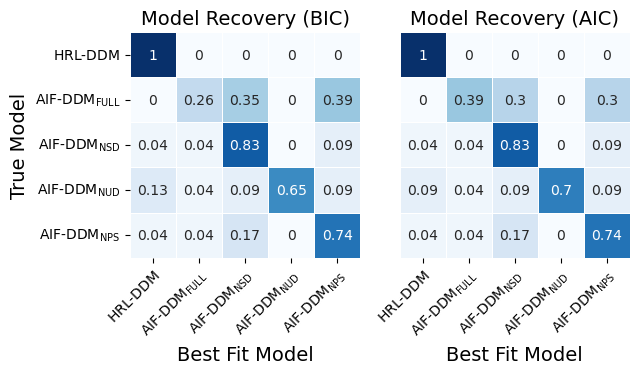

In [29]:
classes = [r"$\text{HRL-DDM}$",
            r"$\text{AIF-DDM}_{\text{FULL}}$", 
            r"$\text{AIF-DDM}_{\text{NSD}}$",
           r"$\text{AIF-DDM}_{\text{NUD}}$",
           r"$\text{AIF-DDM}_{\text{NPS}}$"]

confusion_matrix_bic = np.array([[round(frac_FitM_RL_ddm_best_bic_GenM_RL_ddm,2),
                              round(frac_FitM_AI_ddm0_best_bic_GenM_RL_ddm,2),
                              round(frac_FitM_AI_ddm1_best_bic_GenM_RL_ddm,2),
                              round(frac_FitM_AI_ddm2_best_bic_GenM_RL_ddm,2),
                              round(frac_FitM_AI_ddm3_best_bic_GenM_RL_ddm,2)],
                              [round(frac_FitM_RL_ddm_best_bic_GenM_AI_ddm0,2),
                              round(frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm0,2),
                              round(frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm0,2),
                              round(frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm0,2),
                              round(frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm0,2)],
                              [round(frac_FitM_RL_ddm_best_bic_GenM_AI_ddm1,2),
                               round(frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm1,2),
                              round(frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm1,2),
                              round(frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm1,2),
                              round(frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm1,2)],
                              [round(frac_FitM_RL_ddm_best_bic_GenM_AI_ddm2,2),
                              round(frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm2,2),
                              round(frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm2,2),
                              round(frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm2,2),
                              round(frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm2,2)],
                              [round(frac_FitM_RL_ddm_best_bic_GenM_AI_ddm3,2),
                              round(frac_FitM_AI_ddm0_best_bic_GenM_AI_ddm3,2),
                              round(frac_FitM_AI_ddm1_best_bic_GenM_AI_ddm3,2),
                              round(frac_FitM_AI_ddm2_best_bic_GenM_AI_ddm3,2),
                              round(frac_FitM_AI_ddm3_best_bic_GenM_AI_ddm3,2)]])

for i in range(len(confusion_matrix_bic[0])):
    for j in range(len(confusion_matrix_bic[1])):  
        if confusion_matrix_bic[i,j] == 0:
            confusion_matrix_bic[i,j] = 0

confusion_matrix_aic = np.array([[round(frac_FitM_RL_ddm_best_aic_GenM_RL_ddm,2),
                              round(frac_FitM_AI_ddm0_best_aic_GenM_RL_ddm,2),
                              round(frac_FitM_AI_ddm1_best_aic_GenM_RL_ddm,2),
                              round(frac_FitM_AI_ddm2_best_aic_GenM_RL_ddm,2),
                              round(frac_FitM_AI_ddm3_best_aic_GenM_RL_ddm,2)],
                              [round(frac_FitM_RL_ddm_best_aic_GenM_AI_ddm0,2),
                              round(frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm0,2),
                              round(frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm0,2),
                              round(frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm0,2),
                              round(frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm0,2)],
                              [round(frac_FitM_RL_ddm_best_aic_GenM_AI_ddm1,2),
                               round(frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm1,2),
                              round(frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm1,2),
                              round(frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm1,2),
                              round(frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm1,2)],
                              [round(frac_FitM_RL_ddm_best_aic_GenM_AI_ddm2,2),
                              round(frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm2,2),
                              round(frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm2,2),
                              round(frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm2,2),
                              round(frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm2,2)],
                              [round(frac_FitM_RL_ddm_best_aic_GenM_AI_ddm3,2),
                              round(frac_FitM_AI_ddm0_best_aic_GenM_AI_ddm3,2),
                              round(frac_FitM_AI_ddm1_best_aic_GenM_AI_ddm3,2),
                              round(frac_FitM_AI_ddm2_best_aic_GenM_AI_ddm3,2),
                              round(frac_FitM_AI_ddm3_best_aic_GenM_AI_ddm3,2)]])

for i in range(len(confusion_matrix_aic[0])):
    for j in range(len(confusion_matrix_aic[1])):  
        if confusion_matrix_aic[i,j] == 0:
            confusion_matrix_aic[i,j] = 0

fig, ax = plt.subplots(1, 2, figsize=(6.5, 3.85))

sns.heatmap(confusion_matrix_bic, annot=True, 
            xticklabels=classes, 
            yticklabels=classes,
            cmap="Blues",
            linewidths=.5,
           cbar=False, 
            ax=ax[0]) 

ax[0].set_title('Model Recovery (BIC)', fontsize=14)
ax[0].set_ylabel('True Model', fontsize=14)
ax[0].set_xlabel('Best Fit Model', fontsize=14)

ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)
# Apply rotation and alignment to x-tick labels specifically for this axis
for tick_label in ax[0].get_xticklabels():
    tick_label.set_rotation(45)
    tick_label.set_ha("right")
    tick_label.set_rotation_mode("anchor")

for tick_label in ax[0].get_yticklabels():
    tick_label.set_rotation(0)
    #tick_label.set_ha("left")
    #tick_label.set_rotation_mode("anchor")

sns.heatmap(confusion_matrix_aic, annot=True, 
            xticklabels=classes, 
            yticklabels=False, 
            cmap="Blues",
            linewidths=.5,
           cbar=False, 
            ax=ax[1]) 

ax[1].set_title('Model Recovery (AIC)', fontsize=14)
ax[1].set_xlabel('Best Fit Model', fontsize=14)
ax[1].tick_params(axis='x', labelsize=10)
# Apply rotation and alignment to x-tick labels specifically for this axis
for tick_label in ax[1].get_xticklabels():
    tick_label.set_rotation(45)
    tick_label.set_ha("right")
    tick_label.set_rotation_mode("anchor")


plt.tight_layout() 

plt.savefig("../paper_figures/model_recovery/confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# Model Recovery Analysis for AIF and HRL models

## Import files

In [6]:
# Import all the fits for dataset generated by RL

genM = 'RL'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'/'


df_fitM_RL_genM_RL = pd.read_csv(folder_path+'mr_res_FitM'+'RL'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'.csv')

df_fitM_AI0_genM_RL = pd.read_csv(folder_path+'mr_res_FitM'+'AI0'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'.csv')

df_fitM_AI1_genM_RL = pd.read_csv(folder_path+'mr_res_FitM'+'AI1'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'.csv')

df_fitM_AI2_genM_RL = pd.read_csv(folder_path+'mr_res_FitM'+'AI2'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM + '.csv')

df_fitM_AI3_genM_RL = pd.read_csv(folder_path+'mr_res_FitM'+'AI3'+'_n_starts'+str(n_starts)+
                                          '_GenM' + genM + '.csv')

# Import all the fits for dataset generated by AI0

genM = 'AI0'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'/'


df_fitM_RL_genM_AI0 = pd.read_csv(folder_path+'mr_res_FitM'+'RL'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'.csv')

df_fitM_AI0_genM_AI0 = pd.read_csv(folder_path+'mr_res_FitM'+'AI0'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'.csv')

df_fitM_AI1_genM_AI0 = pd.read_csv(folder_path+'mr_res_FitM'+'AI1'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'.csv')

df_fitM_AI2_genM_AI0 = pd.read_csv(folder_path+'mr_res_FitM'+'AI2'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM + '.csv')

df_fitM_AI3_genM_AI0 = pd.read_csv(folder_path+'mr_res_FitM'+'AI3'+'_n_starts'+str(n_starts)+
                                          '_GenM' + genM + '.csv')

# Import all the fits for dataset generated by AI1

genM = 'AI1'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'/'

df_fitM_RL_genM_AI1 = pd.read_csv(folder_path+'mr_res_FitM'+'RL'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'.csv')

df_fitM_AI0_genM_AI1 = pd.read_csv(folder_path+'mr_res_FitM'+'AI0'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

df_fitM_AI1_genM_AI1 = pd.read_csv(folder_path+'mr_res_FitM'+'AI1'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

df_fitM_AI2_genM_AI1 = pd.read_csv(folder_path+'mr_res_FitM'+'AI2'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

df_fitM_AI3_genM_AI1 = pd.read_csv(folder_path+'mr_res_FitM'+'AI3'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')


# Import all the fits for dataset generated by AI2
genM = 'AI2'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'/'

df_fitM_RL_genM_AI2 = pd.read_csv(folder_path+'mr_res_FitM'+'RL'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'.csv')

df_fitM_AI0_genM_AI2 = pd.read_csv(folder_path+'mr_res_FitM'+'AI0'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

df_fitM_AI1_genM_AI2 = pd.read_csv(folder_path+'mr_res_FitM'+'AI1'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

df_fitM_AI2_genM_AI2 = pd.read_csv(folder_path+'mr_res_FitM'+'AI2'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

df_fitM_AI3_genM_AI2 = pd.read_csv(folder_path+'mr_res_FitM'+'AI3'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

# Import all the fits for dataset generated by AI3
genM = 'AI3'

folder_path = 'synthetic_datasets/'+dataset+'/model_'+genM+'/'

df_fitM_RL_genM_AI3 = pd.read_csv(folder_path+'mr_res_FitM'+'RL'+'_n_starts'+str(n_starts)+
                                          '_GenM'+ genM +'.csv')

df_fitM_AI0_genM_AI3 = pd.read_csv(folder_path+'mr_res_FitM'+'AI0'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

df_fitM_AI1_genM_AI3 = pd.read_csv(folder_path+'mr_res_FitM'+'AI1'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

df_fitM_AI2_genM_AI3 = pd.read_csv(folder_path+'mr_res_FitM'+'AI2'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

df_fitM_AI3_genM_AI3 = pd.read_csv(folder_path+'mr_res_FitM'+'AI3'+'_n_starts'+str(n_starts)+
                                          '_GenM'+genM+'.csv')

## Set number of parameters of each model

In [7]:
RL_k = 9
AI0_k = 11
AI1_k = 10
AI2_k = 10
AI3_k = 10